<a href="https://colab.research.google.com/github/Bingurrr/Covid-19_linear_regression/blob/main/covid_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1. (12 점) csv 파일을 다운로드 받고 pandas를 이용하여 불러오기

#### Task 1-1. (6 점) 데이터 불러오기


In [736]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [737]:
data = pd.read_csv('./owid-covid-data.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

#### Task 1-2. (6 점) ‘date’ 열의 데이터를 날짜 타입으로 변경하기 (Hint! datetime, apply 등을 활용하거나 pandas의 to_datetime을 활용)


In [738]:
data['date'] # dtype : object

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
127812    2021-10-28
127813    2021-10-29
127814    2021-10-30
127815    2021-10-31
127816    2021-11-01
Name: date, Length: 127817, dtype: object

In [739]:
data['date'] = pd.to_datetime(data['date'])
data['date'] # dtype : datetime

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
127812   2021-10-28
127813   2021-10-29
127814   2021-10-30
127815   2021-10-31
127816   2021-11-01
Name: date, Length: 127817, dtype: datetime64[ns]

# Task 2. (32 점) (한국과 일본의 코로나 상황과 대응 차이는 어떨까?) 한국(South Korea)과 일본(Japan)의 코로나 상황 비교 시각화하기

In [740]:
south_korea_data = data[data['location'] == 'South Korea']
south_korea_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
106671,KOR,Asia,South Korea,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.0,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106672,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106673,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.019,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106674,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.039,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106675,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.039,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN


In [741]:
japan_data = data[data['location'] == 'Japan']
japan_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
58639,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126050796.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
58640,JPN,Asia,Japan,2020-01-23,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126050796.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
58641,JPN,Asia,Japan,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126050796.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
58642,JPN,Asia,Japan,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126050796.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
58643,JPN,Asia,Japan,2020-01-26,4.0,2.0,NaN,NaN,NaN,NaN,0.032,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126050796.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN


## Task 2-1. (8 점) 날짜별 확진자 비율 (total_cases_per_million) 시각화

In [ ]:
"""
  두 나라 모두 첫번쨰 인덱스 일 때 new_cases_per_million값이 nan이여서
  처음에는 아직 확진자가 나오지 않아 값이 안들어가 있는 것이라고 생각이되어
  맨 첫값은 0응 두고 그 뒤부터있는 결측치는 그 전날의 데이터를 받아와서
  결측치를 채워 주었다.
"""

south_korea_data['total_cases_per_million'] = south_korea_data['total_cases_per_million'].fillna(method='pad')
japan_data['total_cases_per_million'] = japan_data['total_cases_per_million'].fillna(method='pad')

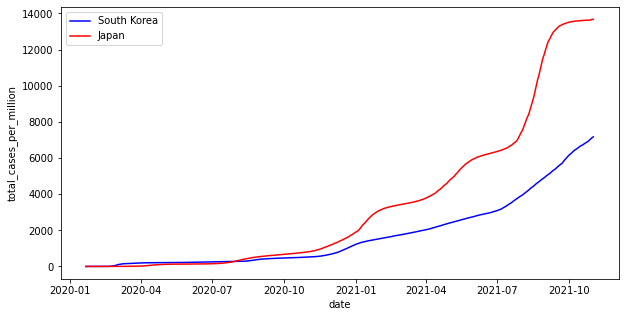

In [743]:
plt.figure(figsize = (10,5))

plt.plot(south_korea_data['date'], south_korea_data['total_cases_per_million'], 'b', label = 'South Korea')
plt.plot(japan_data['date'], japan_data['total_cases_per_million'], 'r', label = 'Japan')
plt.xlabel("date")
plt.ylabel("total_cases_per_million")

plt.legend()
plt.show()

## Task 2-2. (8 점) 날짜별 신규 확진자 비율 (new_cases_per_million) 시각화


In [ ]:
"""
  두 나라 모두 첫번쨰 인덱스 일 때 new_cases_per_million값이 nan이여서
  처음에는 아직 확진자가 나오지 않아 값이 안들어가 있는 것이라고 생각이되어
  맨 첫값은 0응 두고 그 뒤부터있는 결측치는 그 전날의 데이터를 받아와서
  결측치를 채워 주었다.
"""
south_korea_data['new_cases_per_million'][111802] = 0
japan_data['new_cases_per_million'][61028] = 0
south_korea_data['new_cases_per_million'] = south_korea_data['new_cases_per_million'].fillna(method='pad')
japan_data['new_cases_per_million'] = japan_data['new_cases_per_million'].fillna(method='pad')

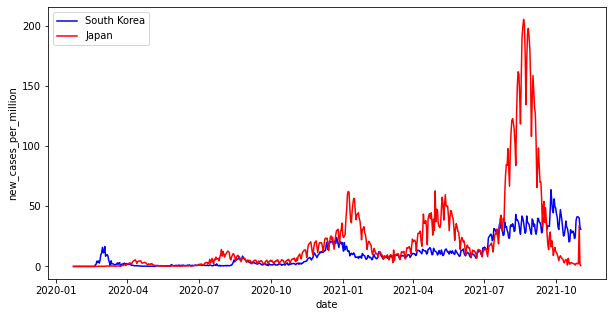

In [745]:
plt.figure(figsize = (10,5))

plt.plot(south_korea_data['date'], south_korea_data['new_cases_per_million'], 'b', label = 'South Korea')
plt.plot(japan_data['date'], japan_data['new_cases_per_million'], 'r', label = 'Japan')
plt.xlabel("date")
plt.ylabel("new_cases_per_million")


plt.legend()
plt.show()

## Task 2-3. (8 점) 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화

In [ ]:
"""
  두 나라 모두 첫번쨰 인덱스 일 때 new_cases_per_million값이 nan이여서
  처음에는 아직 백신 접종자가 나오지 않아 값이 안들어가 있는 것이라고 생각이되어
  맨 첫값은 0응 두고 그 뒤부터있는 결측치는 그 전날의 데이터를 받아와서
  결측치를 채워 주었다.
"""

south_korea_data['people_vaccinated_per_hundred'][111802] = 0
japan_data['people_vaccinated_per_hundred'][61028] = 0
south_korea_data['people_vaccinated_per_hundred'] = south_korea_data['people_vaccinated_per_hundred'].fillna(method='pad')
japan_data['people_vaccinated_per_hundred'] = japan_data['people_vaccinated_per_hundred'].fillna(method='pad')

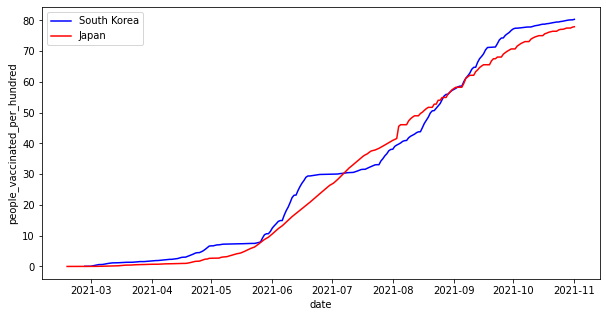

In [747]:
plt.figure(figsize = (10,5))


plt.plot(south_korea_data['date'], south_korea_data['people_vaccinated_per_hundred'] , 'b', label = 'South Korea')
plt.plot(japan_data['date'] , japan_data['people_vaccinated_per_hundred'], 'r', label = 'Japan')

plt.xlabel("date")
plt.ylabel("people_vaccinated_per_hundred")

plt.legend()
plt.show()

## Task 2-4. (8 점) 날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred)
시각화


In [ ]:
"""
  두 나라 모두 첫번쨰 인덱스 일 때 new_cases_per_million값이 nan이여서
  처음에는 아직 백신 접종 완료자가 나오지 않아 값이 안들어가 있는 것이라고 생각이되어
  맨 첫값은 0응 두고 그 뒤부터있는 결측치는 그 전날의 데이터를 받아와서
  결측치를 채워 주었다.
"""
south_korea_data['people_fully_vaccinated_per_hundred'][111802] = 0
japan_data['people_fully_vaccinated_per_hundred'][61028] = 0
south_korea_data['people_fully_vaccinated_per_hundred'] = south_korea_data['people_fully_vaccinated_per_hundred'].fillna(method='pad')
japan_data['people_fully_vaccinated_per_hundred'] = japan_data['people_fully_vaccinated_per_hundred'].fillna(method='pad')

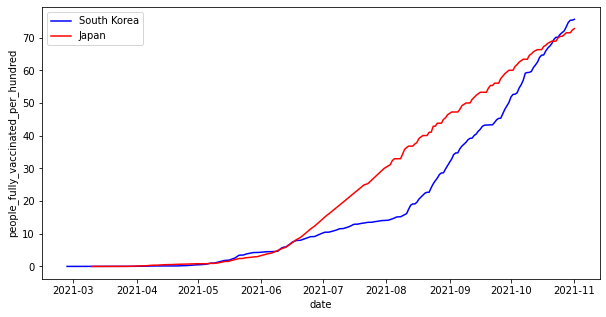

In [749]:
plt.figure(figsize = (10,5))

plt.plot(south_korea_data['date'], south_korea_data['people_fully_vaccinated_per_hundred'], 'b', label = 'South Korea')
plt.plot(japan_data['date'] , japan_data['people_fully_vaccinated_per_hundred'], 'r', label = 'Japan')

plt.xlabel("date")
plt.ylabel("people_fully_vaccinated_per_hundred")

plt.legend()
plt.show()

# Task 3. (31 점) (백신 접종은 사망률을 낮출까?) 백신 접종률(people_vaccinated_per_hundred)과
확진자 비율 대비 사망자 비율(total_deaths_per_million/total_cases_per_million) 사이의
상관관계 알아보기


## Task 3-1. (5 점) Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기

○ location

○ date

○ total_deaths_per_million

○ total_cases_per_million

○ people_vaccinated_per_hundred

○ human_development_index (Task 4에서 사용)


In [750]:
newdata = data[['location','date','total_deaths_per_million','total_cases_per_million', 
               'people_vaccinated_per_hundred','human_development_index']]
newdata

,location,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,2020-02-24,NaN,0.126,NaN,0.511
1,Afghanistan,2020-02-25,NaN,0.126,NaN,0.511
2,Afghanistan,2020-02-26,NaN,0.126,NaN,0.511
3,Afghanistan,2020-02-27,NaN,0.126,NaN,0.511
4,Afghanistan,2020-02-28,NaN,0.126,NaN,0.511
...,...,...,...,...,...,...
127812,Zimbabwe,2021-10-28,309.763,8804.565,21.91,0.571
127813,Zimbabwe,2021-10-29,309.763,8807.613,21.97,0.571
127814,Zimbabwe,2021-10-30,309.763,8807.613,22.00,0.571
127815,Zimbabwe,2021-10-31,309.962,8810.992,22.02,0.571


## Task 3-2. (6 점) 각 국가별로 가장 최근 날짜의 데이터 추출하기 (Hint! pandas의 groupby와 max
활용)

In [751]:
last_data = newdata.groupby(newdata['location']).max()
last_data

,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
location,,,,,
Afghanistan,2021-11-01,182.777,3923.241,6.06,0.511
Africa,2021-11-01,159.008,6191.136,8.93,NaN
Albania,2021-11-01,1020.211,64567.094,35.29,0.795
Algeria,2021-11-01,132.776,4629.799,14.26,0.748
Andorra,2021-11-01,1680.585,200584.327,70.30,0.868
...,...,...,...,...,...
Wallis and Futuna,2021-11-01,NaN,NaN,53.52,NaN
World,2021-11-01,635.699,31383.570,49.63,0.737
Yemen,2021-11-01,61.986,321.377,1.07,0.470


## Task 3-3. (10 점) 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot
그리기


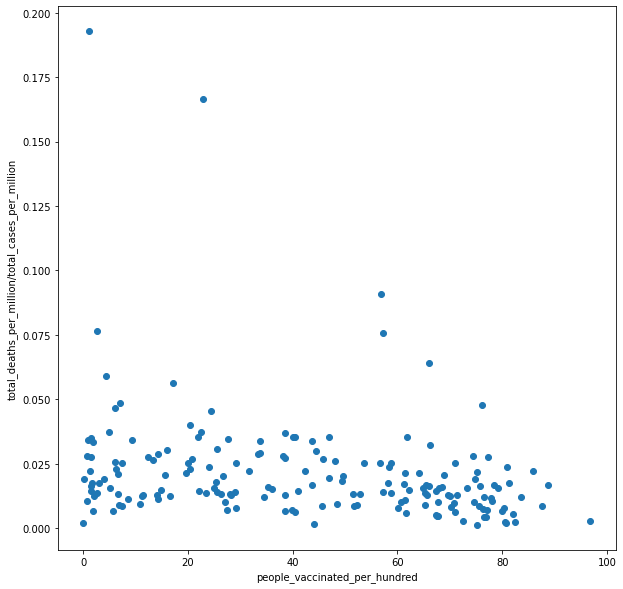

In [752]:
# 3-2에서 구한 데이터프레임을 사용하였다.

# 결측치 제거
last_data = last_data.dropna()


x = last_data['people_vaccinated_per_hundred']
y = last_data['total_deaths_per_million']/last_data['total_cases_per_million']

plt.figure(figsize = (10,10))

plt.scatter(x,y)

plt.xlabel("people_vaccinated_per_hundred")
plt.ylabel("total_deaths_per_million/total_cases_per_million")

plt.show()

## Task 3-4. (10 점) 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (함수 직접 구현)

In [753]:
# x = last_data['people_vaccinated_per_hundred']
# y = last_data['total_deaths_per_million']/last_data['total_cases_per_million']
# x,y 사이의 상관관계


X= last_data['people_vaccinated_per_hundred']
Y = last_data['total_deaths_per_million']/last_data['total_cases_per_million']


mean_x = sum(X)/len(X)
mean_y = sum(Y)/len(Y)

std_x =(sum((x-mean_x)**2 for x in X)/len(X))**0.5
std_y =(sum((y-mean_y)**2 for y in Y)/len(Y))**0.5

cov =  sum( (x-mean_x)*(y-mean_y) for x,y in zip(X,Y))/len(Y)

corr = cov/std_x/std_y

print(corr)

-0.25278690149211824


# Task 4. (25 점) (백신 접종은 전세계적으로 골고루 이뤄지고 있을까?) HDI 계수 (human_development_index)와 백신 접종률(people_vaccinated_per_hundred) 사이의 상관관계 알아보기 (Task 3-1 에서 구한 데이터프레임 활용)


## Task 4-1. (5 점) Task 3-1에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의
상관계수 (Pearson Correlation Coefficient) 구하기 (Task 3-4에서 구현한 함수 사용 혹은 기타
다른 방법 활용 가능)

In [754]:
"""
  3-2의 결과로 나온 데이터로 구하였습니다.
"""

X= last_data['human_development_index']
Y = last_data['people_vaccinated_per_hundred']

mean_x = sum(X)/len(X)
mean_y = sum(Y)/len(Y)

std_x =(sum((x-mean_x)**2 for x in X)/len(X))**0.5
std_y =(sum((y-mean_y)**2 for y in Y)/len(Y))**0.5

cov =  sum( (x-mean_x)*(y-mean_y) for x,y in zip(X,Y))/len(Y)

corr = cov/std_x/std_y

print("corr: ",corr)

corr:  0.8223528627985829


## Task 4-2. (10점) Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)

In [755]:
import torch

X=  last_data['human_development_index']
Y = last_data['people_vaccinated_per_hundred']


x = torch.tensor(X)
y = torch.tensor(Y)


W = torch.zeros(1,1, dtype=torch.float)
b = torch.zeros(1,1, dtype=torch.float)

lr = 0.1

for epoch in range(5001) :
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypo = W*x + b
  cost = torch.mean((hypo-y)**2) # MSE

  cost.backward()
  
  with torch.no_grad():
    W = W - lr*W.grad
    b = b - lr*b.grad 

  if epoch%100 == 0 :
    print(f"epoch:{epoch}, cost: {cost.item():.6f}, W:{W.squeeze()},b:{b}")


epoch:0, cost: 2536.594023, W:6.8033061027526855,b:tensor([[8.4404]])
epoch:100, cost: 455.465814, W:54.28913879394531,b:tensor([[3.8581]])
epoch:200, cost: 361.439442, W:78.83755493164062,b:tensor([[-14.2180]])
epoch:300, cost: 309.340896, W:97.11061096191406,b:tensor([[-27.6732]])
epoch:400, cost: 280.473884, W:110.71249389648438,b:tensor([[-37.6889]])
epoch:500, cost: 264.479074, W:120.83732604980469,b:tensor([[-45.1443]])
epoch:600, cost: 255.616587, W:128.37393188476562,b:tensor([[-50.6938]])
epoch:700, cost: 250.706029, W:133.9839324951172,b:tensor([[-54.8247]])
epoch:800, cost: 247.985144, W:138.1598663330078,b:tensor([[-57.8997]])
epoch:900, cost: 246.477539, W:141.268310546875,b:tensor([[-60.1885]])
epoch:1000, cost: 245.642187, W:143.58216857910156,b:tensor([[-61.8923]])
epoch:1100, cost: 245.179341, W:145.3045196533203,b:tensor([[-63.1606]])
epoch:1200, cost: 244.922892, W:146.58653259277344,b:tensor([[-64.1046]])
epoch:1300, cost: 244.780790, W:147.54087829589844,b:tensor([

In [756]:
print(f"W: {W}, b: {b}" )

W: tensor([[150.3175]]), b: tensor([[-66.8519]])


## Task 4-3. (10점) HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서학습한 직선을 겹쳐 그리기 (scatter plot과 직선이 일치하는지 확인하여 학습이 제대로 되었는지확인)

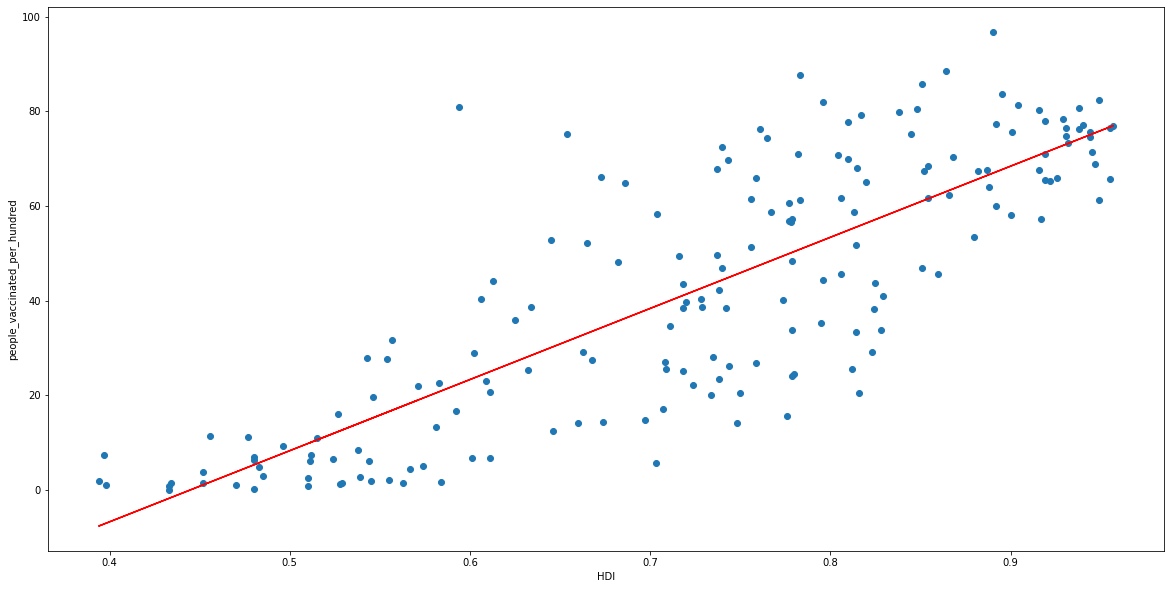

In [757]:
## 4-2의 결과값
W = 150.3175
b = -66.8519


X=  last_data['human_development_index']
Y = last_data['people_vaccinated_per_hundred']


plt.figure(figsize = (20,10))
plt.scatter(X,Y)
plt.plot(X, W*X +b, 'r')
plt.xlabel("HDI")
plt.ylabel("people_vaccinated_per_hundred")
plt.show()